___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings("ignore")

#### *ii. Load Dataset*

In [2]:
tree = pd.read_csv("treetypes.csv")
df = tree.copy()
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7


#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [4]:
df.loc[:, 'Elevation':'Horizontal_Distance_To_Fire_Points'].describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,250000.0,2748.505160,418.300975,1859.0,2375.0,2753.0,3108.0,3857.0
Aspect,250000.0,156.212172,109.652847,0.0,65.0,125.0,260.0,360.0
Slope,250000.0,16.331052,8.317490,0.0,10.0,15.0,22.0,65.0
Horizontal_Distance_To_Hydrology,250000.0,228.094032,209.630153,0.0,66.0,180.0,330.0,1390.0
Vertical_Distance_To_Hydrology,250000.0,50.897820,61.006967,-163.0,5.0,32.0,79.0,598.0
Horizontal_Distance_To_Roadways,250000.0,1719.966576,1330.817603,0.0,756.0,1318.0,2294.0,7112.0
Hillshade_9am,250000.0,212.370488,30.654582,0.0,195.0,220.0,235.0,254.0
Hillshade_Noon,250000.0,218.510700,22.680947,0.0,206.0,222.0,235.0,254.0
Hillshade_3pm,250000.0,134.502764,46.033892,0.0,106.0,137.0,167.0,252.0
Horizontal_Distance_To_Fire_Points,250000.0,1521.756904,1107.378373,0.0,734.0,1273.0,1998.0,7150.0


In [5]:
df.isnull().sum().sum()

0

In [6]:
df.shape

(250000, 55)

In [7]:
df.duplicated().sum()

2521

In [8]:
df[df.duplicated(keep=False)==True].head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
11,2278,199,19,196,97,1167,209,252,171,1139,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
124,2782,91,26,267,129,282,248,190,53,1890,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5
130,2383,65,15,411,186,846,232,210,104,1520,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
155,2350,38,16,0,0,542,217,200,112,488,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
171,3289,101,12,150,10,2710,241,221,108,1641,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7


In [9]:
df[(df.Elevation == 2278) & (df.Aspect == 199)]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
11,2278,199,19,196,97,1167,209,252,171,1139,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
211393,2278,199,19,196,97,1167,209,252,171,1139,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
236360,2278,199,19,196,97,1167,209,252,171,1139,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


In [10]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [11]:
df.shape

(247479, 55)

In [12]:
df.loc[:, 'Elevation':'Wilderness_Area_4'].apply(lambda x: x.nunique())

Elevation                             1983
Aspect                                 361
Slope                                   59
Horizontal_Distance_To_Hydrology      1294
Vertical_Distance_To_Hydrology         578
Horizontal_Distance_To_Roadways       6501
Hillshade_9am                          207
Hillshade_Noon                         165
Hillshade_3pm                          253
Horizontal_Distance_To_Fire_Points    6487
Wilderness_Area_1                        2
Wilderness_Area_2                        2
Wilderness_Area_3                        2
Wilderness_Area_4                        2
dtype: int64

In [13]:
df.Cover_Type.value_counts()

1    35835
2    35780
5    35514
7    35481
6    35430
3    35273
4    34166
Name: Cover_Type, dtype: int64

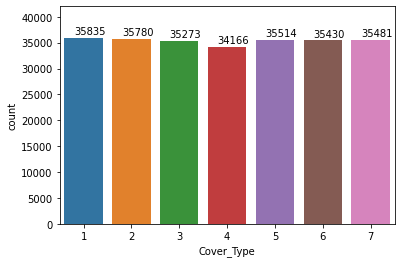

In [14]:
ax = sns.countplot(x='Cover_Type', data=df)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()*1.02))
    
ax.set_ylim(0, 42000);

In [15]:
df.iloc[:, [0,1,2,3,4,5,6,7,8,9,54]].corr()['Cover_Type'].drop('Cover_Type')

Elevation                             0.012893
Aspect                                0.005488
Slope                                 0.075935
Horizontal_Distance_To_Hydrology      0.009012
Vertical_Distance_To_Hydrology        0.083143
Horizontal_Distance_To_Roadways      -0.108788
Hillshade_9am                        -0.017944
Hillshade_Noon                       -0.107009
Hillshade_3pm                        -0.055365
Horizontal_Distance_To_Fire_Points   -0.089343
Name: Cover_Type, dtype: float64

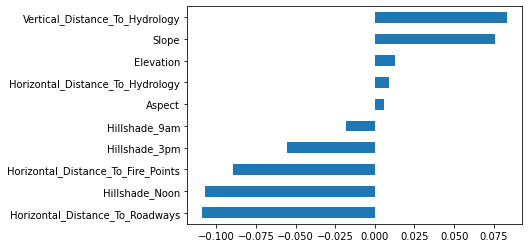

In [16]:
df.iloc[:, [0,1,2,3,4,5,6,7,8,9,54]].corr()['Cover_Type'].drop('Cover_Type').sort_values().plot.barh()

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [17]:
df.isnull().sum().sum()

0

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

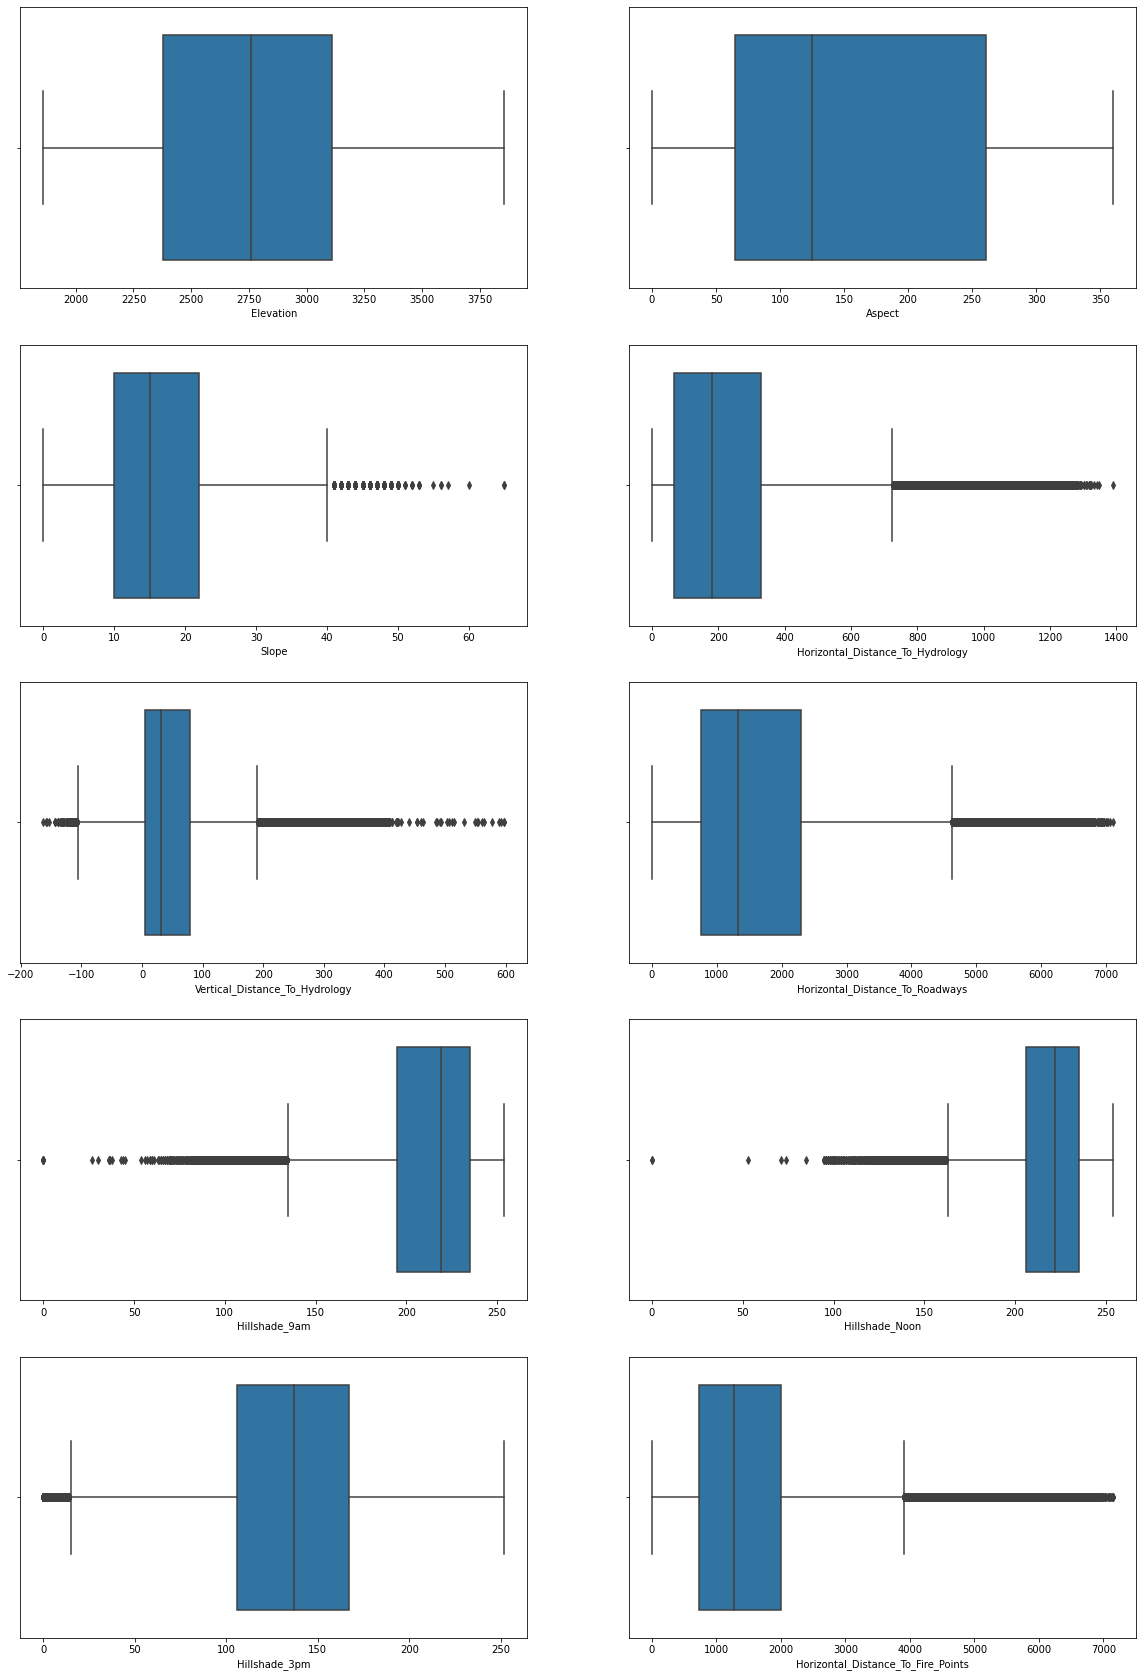

In [18]:
index = 0
plt.figure(figsize=(20,30))
for col in df.loc[:, 'Elevation':'Horizontal_Distance_To_Fire_Points'].columns:   
    index += 1
    plt.subplot(5,2,index)
    sns.boxplot(data=df, x=col)

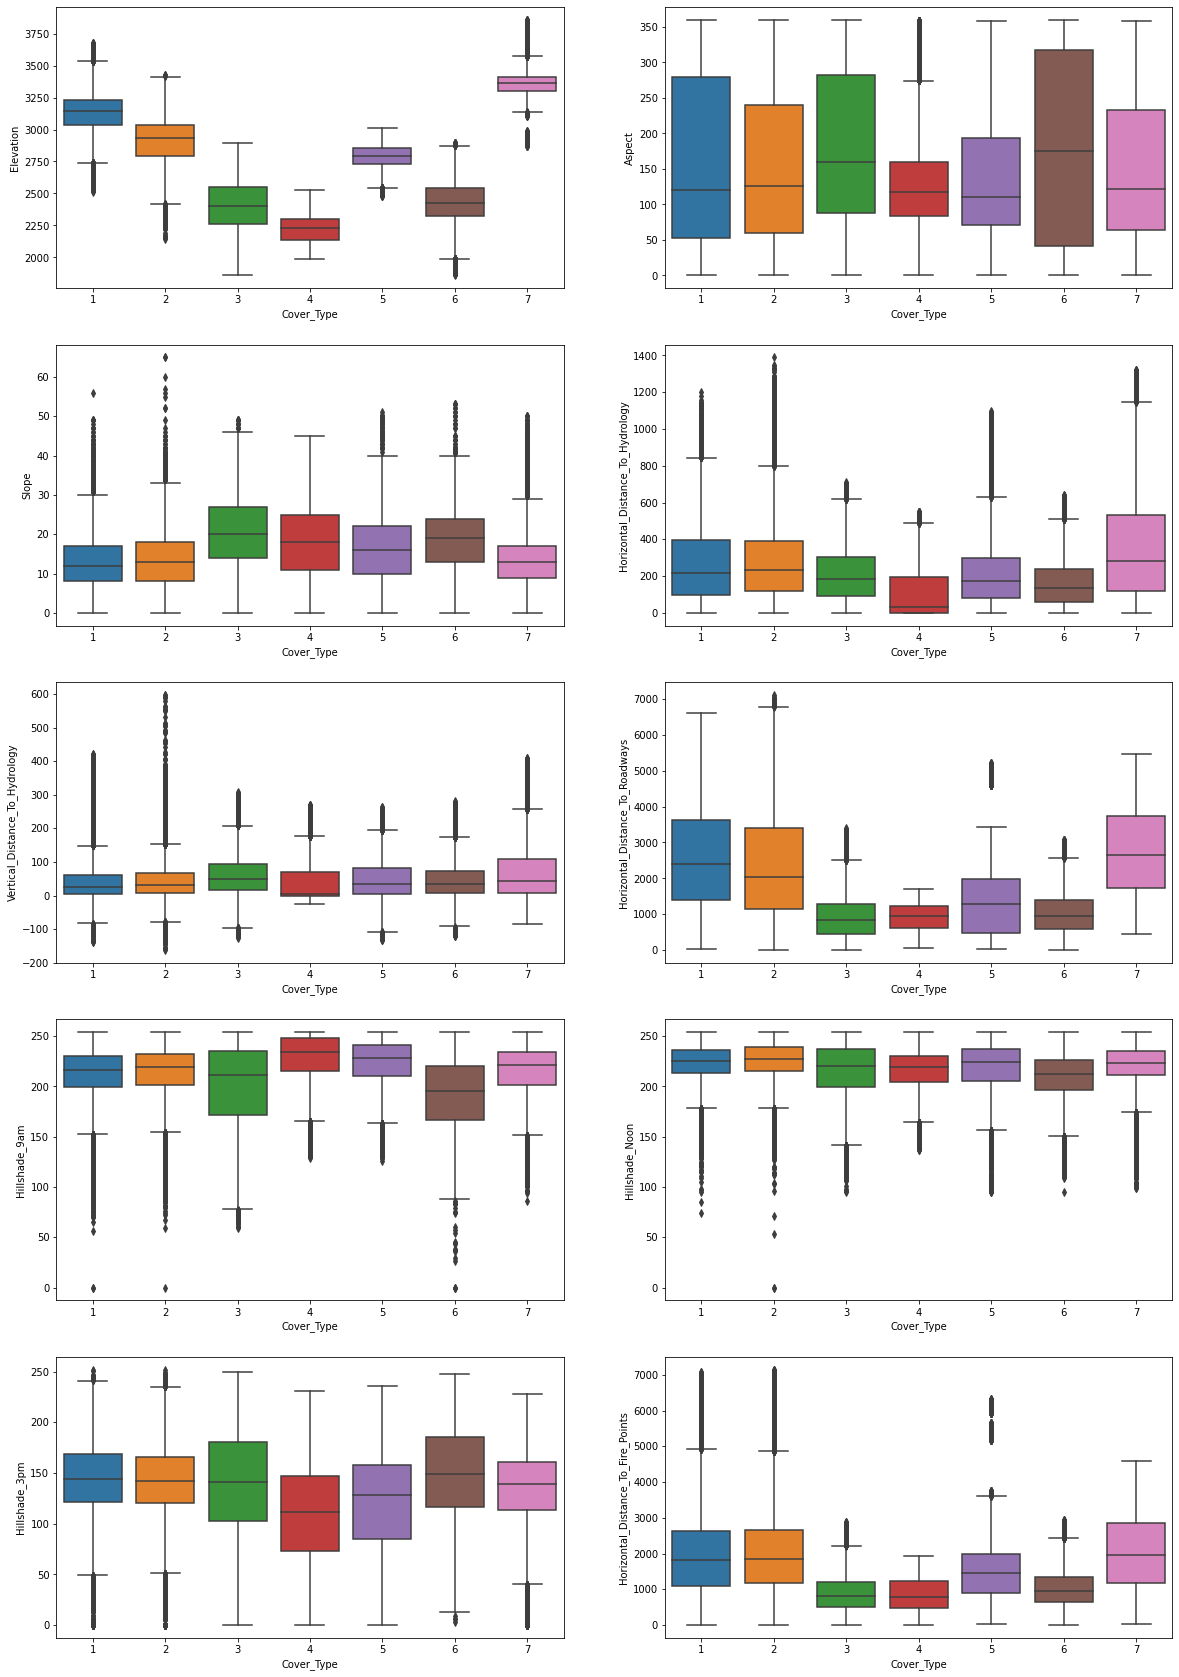

In [19]:
index = 0
plt.figure(figsize=(20,30))
for col in df.loc[:, 'Elevation':'Horizontal_Distance_To_Fire_Points'].columns:
    index += 1
    plt.subplot(5,2,index)
    sns.boxplot(x='Cover_Type', y=col, data=df)

In [20]:
# total outliers for 1.5 IQR

num_of_lower_outliers = 0
num_of_upper_outliers = 0

for col in df.loc[:, 'Elevation':'Horizontal_Distance_To_Fire_Points'].columns:
    for group1 in df.Cover_Type.unique().tolist():
        
        cond1 = df[(df.Cover_Type == group1)][col]        
            
        IQR = cond1.quantile(0.75) - cond1.quantile(0.25)
        lower_lim = cond1.quantile(0.25) - 1.5*IQR
        upper_lim = cond1.quantile(0.75) + 1.5*IQR
               
        cond2 = df[(df.Cover_Type == group1) & (df[col] < lower_lim)].shape[0]
        cond3 = df[(df.Cover_Type == group1) & (df[col] > upper_lim)].shape[0]
               
        num_of_lower_outliers += cond2
        num_of_upper_outliers += cond3
        
print(num_of_lower_outliers)
print(num_of_upper_outliers)

12608
31290


***

In [21]:
def outliers(col):
    
    IQR_factor = [1.5, 2, 3]

    for factor in IQR_factor:
        
        lower_outliers = 0
        upper_outliers = 0
        
        for group1 in df.Cover_Type.unique().tolist():
                       
            cond1 = df[(df.Cover_Type == group1)][col]        
            
            IQR = cond1.quantile(0.75) - cond1.quantile(0.25)
            lower_lim = cond1.quantile(0.25) - factor*IQR
            upper_lim = cond1.quantile(0.75) + factor*IQR
            
            cond2 = df[(df.Cover_Type == group1) & (df[col] < lower_lim)].shape[0]
            cond3 = df[(df.Cover_Type == group1) & (df[col] > upper_lim)].shape[0]
            
            lower_outliers += cond2
            upper_outliers += cond3
            
        print(f'for {factor:<3} IQR: ')
        print('-----------------')
        print('Number of lower outliers :', lower_outliers)
        print('Number of upper outliers :', upper_outliers)
        print('')

In [22]:
def drop_outliers(col, factor):

    num_of_lower_outliers = 0
    num_of_upper_outliers = 0
    outliers_index = []

    for group1 in df.Cover_Type.unique().tolist():
        
        cond1 = df[(df.Cover_Type == group1)][col]        
            
        IQR = cond1.quantile(0.75) - cond1.quantile(0.25)
        lower_lim = cond1.quantile(0.25) - factor*IQR
        upper_lim = cond1.quantile(0.75) + factor*IQR
               
        cond2 = df[(df.Cover_Type == group1) & (df[col] < lower_lim)]
        cond3 = df[(df.Cover_Type == group1) & (df[col] > upper_lim)]
        
        if cond2.shape[0] > 0:
            outliers_index.append(cond2.index.tolist())
                
        if cond3.shape[0] > 0:
            outliers_index.append(cond3.index.tolist())
            
    df.drop(index=sum(outliers_index, []), inplace=True)
    df.reset_index(drop=True, inplace=True)

In [23]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', '

***Elevation***

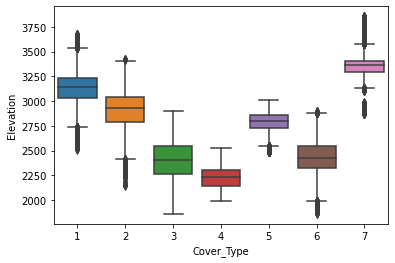

In [24]:
sns.boxplot(x='Cover_Type', y='Elevation', data=df)

In [25]:
df.Elevation.groupby(df.Cover_Type).describe()

,count,mean,std,min,25%,50%,75%,max
Cover_Type,,,,,,,,
1,35835.0,3129.284219,156.624335,2510.0,3035.0,3146.0,3234.0,3680.0
2,35780.0,2919.110285,186.471384,2142.0,2791.0,2934.0,3039.0,3425.0
3,35273.0,2392.805715,196.795700,1859.0,2259.0,2402.0,2547.0,2897.0
4,34166.0,2223.001493,101.824556,1988.0,2140.0,2231.0,2303.0,2525.0
5,35514.0,2786.907698,96.580436,2483.0,2732.0,2795.5,2856.0,3010.0
6,35430.0,2418.645216,187.868579,1863.0,2321.0,2428.0,2543.0,2898.0
7,35481.0,3361.793664,107.271786,2868.0,3299.0,3362.0,3409.0,3857.0


In [26]:
outliers('Elevation')

for 1.5 IQR: 
-----------------
Number of lower outliers : 2471
Number of upper outliers : 1467

for 2   IQR: 
-----------------
Number of lower outliers : 350
Number of upper outliers : 1043

for 3   IQR: 
-----------------
Number of lower outliers : 132
Number of upper outliers : 480



In [27]:
df.shape

(247479, 55)

In [28]:
drop_outliers('Elevation', 2)

In [29]:
df.shape

(246086, 55)

***Aspect***

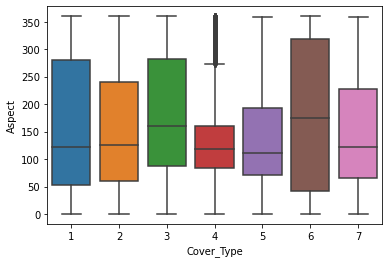

In [30]:
sns.boxplot(x='Cover_Type', y='Aspect', data=df)

In [31]:
df.Aspect.groupby(df.Cover_Type).describe()

,count,mean,std,min,25%,50%,75%,max
Cover_Type,,,,,,,,
1,35657.0,156.883305,116.829668,0.0,53.0,122.0,280.0,360.0
2,35747.0,151.617283,107.847198,0.0,60.0,126.0,240.0,360.0
3,35273.0,175.475746,107.509295,0.0,88.0,160.0,283.0,360.0
4,34166.0,137.563133,86.308314,0.0,84.0,118.0,160.0,358.0
5,35513.0,140.187312,91.879280,0.0,71.0,111.0,193.0,359.0
6,35416.0,180.466230,133.228301,0.0,42.0,175.0,318.0,360.0
7,34314.0,151.746925,108.432271,0.0,66.0,122.0,227.0,359.0


In [32]:
outliers('Aspect')

for 1.5 IQR: 
-----------------
Number of lower outliers : 0
Number of upper outliers : 4162

for 2   IQR: 
-----------------
Number of lower outliers : 0
Number of upper outliers : 3007

for 3   IQR: 
-----------------
Number of lower outliers : 0
Number of upper outliers : 0



In [33]:
drop_outliers('Aspect', 2)

***Slope***

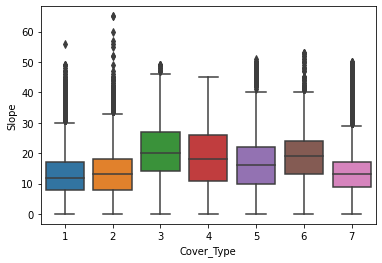

In [34]:
sns.boxplot(x='Cover_Type', y='Slope', data=df)

In [35]:
df.Slope.groupby(df.Cover_Type).describe()

,count,mean,std,min,25%,50%,75%,max
Cover_Type,,,,,,,,
1,35657.0,13.061559,6.808306,0.0,8.0,12.0,17.0,56.0
2,35747.0,13.579629,7.125130,0.0,8.0,13.0,18.0,65.0
3,35273.0,20.565021,8.810898,0.0,14.0,20.0,27.0,49.0
4,31159.0,18.712443,9.021160,0.0,11.0,18.0,26.0,45.0
5,35513.0,16.239828,8.043526,0.0,10.0,16.0,22.0,51.0
6,35416.0,18.742800,7.739454,0.0,13.0,19.0,24.0,53.0
7,34314.0,13.954625,7.412825,0.0,9.0,13.0,17.0,50.0


In [36]:
outliers('Slope')

for 1.5 IQR: 
-----------------
Number of lower outliers : 0
Number of upper outliers : 2729

for 2   IQR: 
-----------------
Number of lower outliers : 0
Number of upper outliers : 1175

for 3   IQR: 
-----------------
Number of lower outliers : 0
Number of upper outliers : 155



In [37]:
drop_outliers('Slope', 1.5)

***Horizontal_Distance_To_Hydrology***

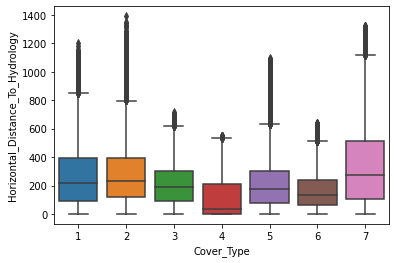

In [38]:
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Hydrology', data=df)

In [39]:
df.Horizontal_Distance_To_Hydrology.groupby(df.Cover_Type).describe()

,count,mean,std,min,25%,50%,75%,max
Cover_Type,,,,,,,,
1,35039.0,270.410229,217.139142,0.0,95.0,217.0,397.0,1200.0
2,35335.0,278.266252,209.930379,0.0,120.0,234.0,391.0,1390.0
3,35260.0,210.463783,141.612105,0.0,93.0,187.0,303.0,714.0
4,31159.0,115.371642,142.229217,0.0,0.0,32.0,214.0,550.0
5,35411.0,212.558329,181.122844,0.0,79.0,174.0,300.0,1100.0
6,35361.0,159.424309,124.125005,0.0,60.0,133.0,240.0,643.0
7,32785.0,342.973646,280.910055,0.0,109.0,277.0,513.0,1323.0


In [40]:
outliers('Horizontal_Distance_To_Hydrology')

for 1.5 IQR: 
-----------------
Number of lower outliers : 0
Number of upper outliers : 3658

for 2   IQR: 
-----------------
Number of lower outliers : 0
Number of upper outliers : 1162

for 3   IQR: 
-----------------
Number of lower outliers : 0
Number of upper outliers : 172



In [41]:
drop_outliers('Horizontal_Distance_To_Hydrology', 1.5)

***Vertical_Distance_To_Hydrology***

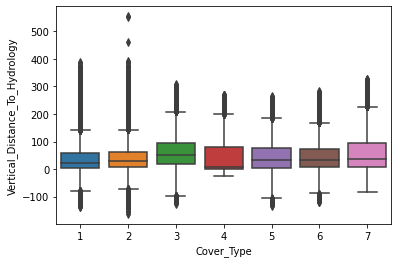

In [42]:
sns.boxplot(x='Cover_Type', y='Vertical_Distance_To_Hydrology', data=df)

In [43]:
df.Vertical_Distance_To_Hydrology.groupby(df.Cover_Type).describe()

,count,mean,std,min,25%,50%,75%,max
Cover_Type,,,,,,,,
1,34446.0,38.933026,51.493796,-139.0,4.0,23.0,59.0,390.0
2,34459.0,42.056705,51.686592,-163.0,8.0,29.0,62.0,554.0
3,35096.0,62.156400,58.165595,-125.0,18.0,50.0,94.0,307.0
4,31098.0,44.092096,59.403643,-24.0,0.0,8.0,80.0,270.0
5,34224.0,47.522002,55.641622,-133.0,4.0,32.0,77.0,264.0
6,35030.0,44.593006,46.074868,-121.0,8.0,32.0,72.0,282.0
7,32339.0,59.146665,67.313452,-84.0,6.0,38.0,94.0,327.0


In [44]:
outliers('Vertical_Distance_To_Hydrology')

for 1.5 IQR: 
-----------------
Number of lower outliers : 282
Number of upper outliers : 7119

for 2   IQR: 
-----------------
Number of lower outliers : 66
Number of upper outliers : 3131

for 3   IQR: 
-----------------
Number of lower outliers : 2
Number of upper outliers : 658



In [45]:
drop_outliers('Vertical_Distance_To_Hydrology', 2)

***Horizontal_Distance_To_Roadways***

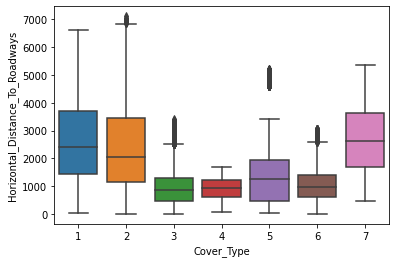

In [46]:
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Roadways', data=df)

In [47]:
df.Horizontal_Distance_To_Roadways.groupby(df.Cover_Type).describe()

,count,mean,std,min,25%,50%,75%,max
Cover_Type,,,,,,,,
1,33310.0,2650.917052,1515.532313,30.0,1423.0,2423.5,3697.0,6607.0
2,33356.0,2435.577018,1604.988174,0.0,1159.0,2051.0,3442.0,7112.0
3,34891.0,937.925396,608.850495,0.0,458.0,849.0,1284.0,3408.0
4,30977.0,905.600897,368.435750,70.0,611.0,934.0,1217.0,1700.0
5,33920.0,1344.972317,1055.716898,30.0,454.0,1266.0,1936.0,5206.0
6,34817.0,1037.879944,572.157835,0.0,596.0,971.0,1394.0,3074.0
7,32224.0,2686.439300,1165.015075,484.0,1705.0,2639.0,3651.0,5365.0


In [48]:
outliers('Horizontal_Distance_To_Roadways')

for 1.5 IQR: 
-----------------
Number of lower outliers : 0
Number of upper outliers : 2267

for 2   IQR: 
-----------------
Number of lower outliers : 0
Number of upper outliers : 743

for 3   IQR: 
-----------------
Number of lower outliers : 0
Number of upper outliers : 0



In [49]:
drop_outliers('Horizontal_Distance_To_Roadways', 2)

***Hillshade_9am***

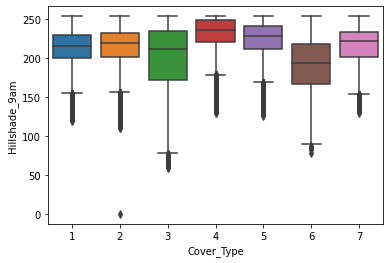

In [50]:
sns.boxplot(x='Cover_Type', y='Hillshade_9am', data=df)

In [51]:
df.Hillshade_9am.groupby(df.Cover_Type).describe()

,count,mean,std,min,25%,50%,75%,max
Cover_Type,,,,,,,,
1,33310.0,212.754668,22.979397,120.0,200.0,216.0,230.0,254.0
2,33356.0,215.020116,23.183391,0.0,202.0,220.0,232.0,254.0
3,34715.0,201.162811,40.735631,59.0,172.0,212.0,235.0,254.0
4,30977.0,231.605643,21.072331,130.0,221.0,237.0,249.0,254.0
5,33386.0,223.804978,22.298802,126.0,212.0,229.0,241.0,254.0
6,34784.0,191.942876,33.309490,79.0,167.0,194.0,219.0,254.0
7,32224.0,217.247176,22.163435,130.0,202.0,222.0,234.0,254.0


In [52]:
outliers('Hillshade_9am')

for 1.5 IQR: 
-----------------
Number of lower outliers : 3550
Number of upper outliers : 0

for 2   IQR: 
-----------------
Number of lower outliers : 1133
Number of upper outliers : 0

for 3   IQR: 
-----------------
Number of lower outliers : 27
Number of upper outliers : 0



In [53]:
drop_outliers('Hillshade_9am', 1.5)

***Hillshade_Noon***

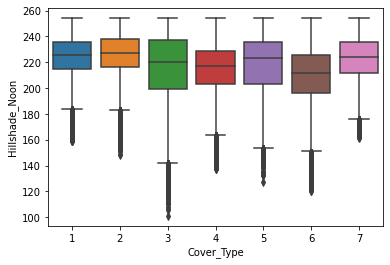

In [54]:
sns.boxplot(x='Cover_Type', y='Hillshade_Noon', data=df)

In [55]:
df.Hillshade_Noon.groupby(df.Cover_Type).describe()

,count,mean,std,min,25%,50%,75%,max
Cover_Type,,,,,,,,
1,32631.0,224.273329,16.754205,159.0,215.0,226.0,236.0,254.0
2,32590.0,225.633875,17.560636,148.0,216.0,227.0,238.0,254.0
3,34654.0,215.191637,27.665942,101.0,199.0,220.0,237.0,254.0
4,29991.0,215.399120,20.586859,137.0,203.0,217.0,229.0,254.0
5,32638.0,218.038483,24.117174,127.0,203.0,223.0,236.0,254.0
6,34778.0,209.469406,23.905218,120.0,196.0,212.0,226.0,254.0
7,31920.0,223.285652,16.704016,161.0,212.0,224.0,236.0,254.0


In [56]:
outliers('Hillshade_Noon')

for 1.5 IQR: 
-----------------
Number of lower outliers : 3270
Number of upper outliers : 0

for 2   IQR: 
-----------------
Number of lower outliers : 643
Number of upper outliers : 0

for 3   IQR: 
-----------------
Number of lower outliers : 2
Number of upper outliers : 0



In [57]:
drop_outliers('Hillshade_Noon', 1.5)

***Hillshade_3pm***

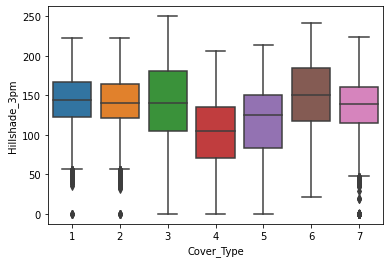

In [58]:
sns.boxplot(x='Cover_Type', y='Hillshade_3pm', data=df)

In [59]:
df.Hillshade_3pm.groupby(df.Cover_Type).describe()

,count,mean,std,min,25%,50%,75%,max
Cover_Type,,,,,,,,
1,31905.0,144.117192,31.902930,0.0,123.0,144.0,167.0,223.0
2,31873.0,142.035171,31.859503,0.0,121.0,141.0,164.0,222.0
3,34229.0,140.840252,51.800876,0.0,105.0,141.0,181.0,250.0
4,29597.0,103.231037,42.927691,0.0,71.0,105.0,135.0,206.0
5,32484.0,118.655276,46.521621,0.0,83.0,125.0,151.0,214.0
6,34180.0,149.795465,44.384814,22.0,118.0,151.0,185.0,242.0
7,31664.0,136.613094,33.253855,0.0,115.0,139.0,160.0,224.0


In [60]:
outliers('Hillshade_3pm')

for 1.5 IQR: 
-----------------
Number of lower outliers : 440
Number of upper outliers : 0

for 2   IQR: 
-----------------
Number of lower outliers : 84
Number of upper outliers : 0

for 3   IQR: 
-----------------
Number of lower outliers : 0
Number of upper outliers : 0



In [61]:
drop_outliers('Hillshade_3pm', 1.5)

***Horizontal_Distance_To_Fire_Points***

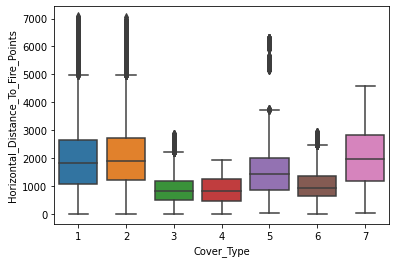

In [62]:
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Fire_Points', data=df)

In [63]:
df.Horizontal_Distance_To_Fire_Points.groupby(df.Cover_Type).describe()

,count,mean,std,min,25%,50%,75%,max
Cover_Type,,,,,,,,
1,31781.0,2021.501778,1255.670361,0.0,1092.0,1830.0,2649.0,7080.0
2,31722.0,2215.760009,1443.951274,0.0,1203.0,1909.0,2713.0,7065.0
3,34229.0,906.224196,523.666790,1.0,514.0,815.0,1191.0,2873.0
4,29597.0,870.005136,487.769064,0.0,481.0,813.0,1264.0,1920.0
5,32484.0,1579.438400,1036.856981,42.0,870.0,1439.0,2015.0,6317.0
6,34180.0,1058.957636,580.828401,3.0,642.0,946.0,1367.0,2936.0
7,31499.0,2065.228420,1082.247061,22.0,1196.0,1959.0,2820.0,4586.0


In [64]:
outliers('Horizontal_Distance_To_Fire_Points')

for 1.5 IQR: 
-----------------
Number of lower outliers : 0
Number of upper outliers : 6945

for 2   IQR: 
-----------------
Number of lower outliers : 0
Number of upper outliers : 3277

for 3   IQR: 
-----------------
Number of lower outliers : 0
Number of upper outliers : 918



In [65]:
drop_outliers('Horizontal_Distance_To_Fire_Points', 2)

### Deal with Outliers

#### *ii. Drop Outliers*

In [66]:
df.shape

(222215, 55)

### Now, let's take a closer look at correlation of continuous columns.

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [67]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', '

In [68]:
df['Distance_To_Hydrology'] = ((df['Horizontal_Distance_To_Hydrology'] ** 2) + (df['Vertical_Distance_To_Hydrology'] ** 2))**0.5

In [69]:
df[['Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Hydrology']].head()

,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Hydrology
0,2245,212
1,3734,134
2,4369,346
3,1320,270
4,570,507


In [70]:
df['Avg_Horizontal_Distance_To_Hydrology'] = (df['Horizontal_Distance_To_Hydrology'] + df['Horizontal_Distance_To_Roadways']) / 2

In [71]:
df['Avg_Vertical_Distance_To_Hydrology'] = (df['Elevation'] + df['Vertical_Distance_To_Hydrology']) / 2

In [72]:
del df['Horizontal_Distance_To_Hydrology'], df['Vertical_Distance_To_Hydrology']

In [73]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40',
       'Cover_Type', 'Distance

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, make_scorer
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_curve

In [75]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [76]:
X = df.drop(['Cover_Type'], axis=1)
y = df['Cover_Type']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [78]:
print("Train features shape : ", X_train.shape)
print("Test features shape  : ", X_test.shape)

Train features shape :  (177772, 55)
Test features shape  :  (44443, 55)


In [79]:
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [80]:
from sklearn.svm import LinearSVC

In [81]:
operations = [("scaler", MinMaxScaler()), ("SVC", LinearSVC(random_state=42))]
SVM_model = Pipeline(steps=operations)

In [82]:
SVM_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('SVC', LinearSVC(random_state=42))])

In [83]:
eval_metric(SVM_model, X_train, y_train, X_test, y_test)

Test_Set
[[4098  969    7    0  358   81  743]
 [1555 2971  142    2 1063  295   63]
 [   0   24 3640  865  377 1892    0]
 [   0    0  322 5402    0  195    0]
 [ 199  760  564    0 4336  408    0]
 [   1  145 1171  693  528 4274    0]
 [ 533   32    0    0   26    0 5709]]
              precision    recall  f1-score   support

           1       0.64      0.66      0.65      6256
           2       0.61      0.49      0.54      6091
           3       0.62      0.54      0.58      6798
           4       0.78      0.91      0.84      5919
           5       0.65      0.69      0.67      6267
           6       0.60      0.63      0.61      6812
           7       0.88      0.91      0.89      6300

    accuracy                           0.68     44443
   macro avg       0.68      0.69      0.68     44443
weighted avg       0.68      0.68      0.68     44443


Train_Set
[[16465  3706    28     0  1473   298  3056]
 [ 6248 12118   548    19  4070  1173   186]
 [    0   132 14591  3461 

In [85]:
y_pred = SVM_model.predict(X_test)
SVM_accuracy = accuracy_score(y_test, y_pred)

In [86]:
SVM_model.get_params()

{'SVC': LinearSVC(random_state=42),
 'SVC__C': 1.0,
 'SVC__class_weight': None,
 'SVC__dual': True,
 'SVC__fit_intercept': True,
 'SVC__intercept_scaling': 1,
 'SVC__loss': 'squared_hinge',
 'SVC__max_iter': 1000,
 'SVC__multi_class': 'ovr',
 'SVC__penalty': 'l2',
 'SVC__random_state': 42,
 'SVC__tol': 0.0001,
 'SVC__verbose': 0,
 'memory': None,
 'scaler': MinMaxScaler(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'steps': [('scaler', MinMaxScaler()), ('SVC', LinearSVC(random_state=42))],
 'verbose': False}

In [87]:
# cross_validate

operations = [("scaler", MinMaxScaler()), ("SVC", LinearSVC(random_state=42))]
SVM_model = Pipeline(steps=operations)

scores = cross_validate(SVM_model, X_train, y_train, scoring='accuracy', cv=5)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_score    0.685569
dtype: float64

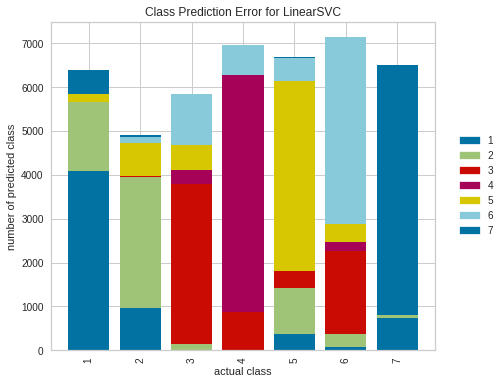

In [88]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(SVM_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.poof();

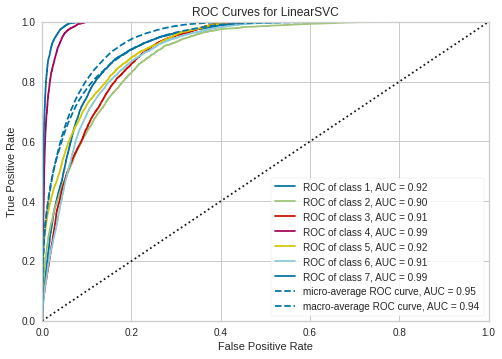

In [89]:
from yellowbrick.classifier import ROCAUC
model = SVM_model
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)     
visualizer.show(); 

In [90]:
# GridSearch

operations = [("scaler", MinMaxScaler()), ("SVC", LinearSVC(random_state=42))]
SVM_model = Pipeline(steps=operations)

param_grid = {'SVC__C': [0.001, 0.01, 0.1],
              'SVC__penalty': ["l1", "l2"]}

SVM_grid_model = GridSearchCV(estimator=SVM_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
SVM_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVC', LinearSVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.001, 0.01, 0.1],
                         'SVC__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [91]:
SVM_grid_model.best_params_

{'SVC__C': 0.1, 'SVC__penalty': 'l2'}

In [92]:
SVM_grid_model.best_score_

0.6803883732879141

In [93]:
eval_metric(SVM_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[4074  966    7    0  388   76  745]
 [1552 2887  144    4 1165  278   61]
 [   0   15 3556  892  375 1960    0]
 [   0    0  306 5414    0  199    0]
 [ 224  739  542    0 4347  415    0]
 [   1  148 1186  714  534 4229    0]
 [ 579   32    0    0   26    0 5663]]
              precision    recall  f1-score   support

           1       0.63      0.65      0.64      6256
           2       0.60      0.47      0.53      6091
           3       0.62      0.52      0.57      6798
           4       0.77      0.91      0.84      5919
           5       0.64      0.69      0.66      6267
           6       0.59      0.62      0.61      6812
           7       0.88      0.90      0.89      6300

    accuracy                           0.68     44443
   macro avg       0.68      0.68      0.68     44443
weighted avg       0.67      0.68      0.67     44443


Train_Set
[[16398  3699    27     1  1549   296  3056]
 [ 6248 11818   561    25  4412  1102   196]
 [    0    80 14339  3518 

In [94]:
y_pred = SVM_grid_model.predict(X_test)
SVM_grid_accuracy = accuracy_score(y_test, y_pred)

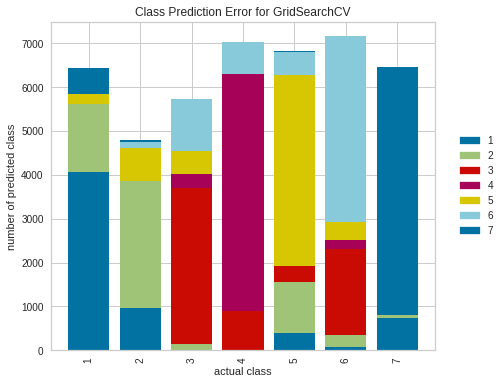

In [95]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(SVM_grid_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.poof();

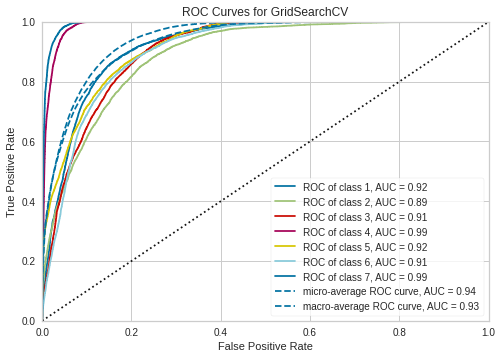

In [96]:
from yellowbrick.classifier import ROCAUC
model = SVM_grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)     
visualizer.show(); 

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [99]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set
[[5359  740    2    0   24    4  127]
 [ 824 4976   78    0  140   60   13]
 [   1   54 6418   63   29  233    0]
 [   0    0   24 5879    0   16    0]
 [  14   48   15    0 6186    4    0]
 [   1   25  223   29   10 6524    0]
 [  73    7    0    0    0    0 6220]]
              precision    recall  f1-score   support

           1       0.85      0.86      0.86      6256
           2       0.85      0.82      0.83      6091
           3       0.95      0.94      0.95      6798
           4       0.98      0.99      0.99      5919
           5       0.97      0.99      0.98      6267
           6       0.95      0.96      0.96      6812
           7       0.98      0.99      0.98      6300

    accuracy                           0.94     44443
   macro avg       0.93      0.93      0.93     44443
weighted avg       0.93      0.94      0.93     44443


Train_Set
[[25026     0     0     0     0     0     0]
 [    0 24362     0     0     0     0     0]
 [    0     0 27191     0 

In [100]:
y_pred = DT_model.predict(X_test)
DT_accuracy = accuracy_score(y_test, y_pred)

In [101]:
DT_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [102]:
# cross validate

model = DecisionTreeClassifier()

scores = cross_validate(model, X_train, y_train, scoring=['accuracy'], cv=5)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy    0.927908
dtype: float64

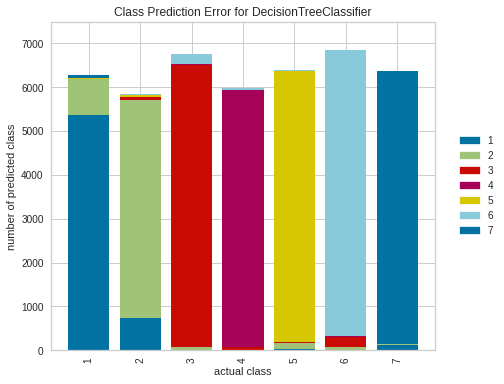

In [103]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.poof();

In [104]:
np.sort(DT_model.feature_importances_)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.56536762e-06, 1.09422794e-05,
       3.35729026e-05, 7.10923688e-05, 1.08061515e-04, 1.61465865e-04,
       2.92295293e-04, 3.66117632e-04, 3.88658858e-04, 4.11355255e-04,
       4.65755000e-04, 6.17195056e-04, 8.11246539e-04, 1.18942583e-03,
       1.25008925e-03, 1.34234114e-03, 1.42935267e-03, 1.50370299e-03,
       1.57239027e-03, 2.11581371e-03, 2.62788593e-03, 2.64018989e-03,
       2.76395109e-03, 2.78260383e-03, 2.88685031e-03, 3.20575639e-03,
       3.26428404e-03, 3.67804540e-03, 3.94510910e-03, 4.00661940e-03,
       4.48691960e-03, 4.78430897e-03, 5.66529275e-03, 6.81819573e-03,
       7.68586909e-03, 1.40859642e-02, 1.56511981e-02, 1.63750328e-02,
       1.77171238e-02, 1.78653696e-02, 2.37707946e-02, 2.69109519e-02,
       3.04693819e-02, 4.21820635e-02, 6.55865865e-02, 7.02447416e-02,
       7.52730015e-02, 9.98051339e-02, 4.08673335e-01])

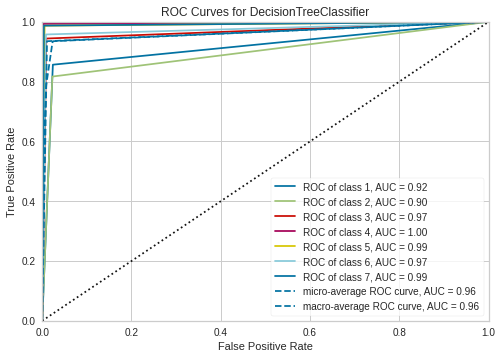

In [105]:
from yellowbrick.classifier import ROCAUC
model = DT_model
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)     
visualizer.show(); 

In [106]:
# GridSearch

model = DecisionTreeClassifier()

param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3, 4, 5],
              "max_depth": [None, 2, 3, 4, 5]}

DT_grid_model = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
DT_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [107]:
DT_grid_model.best_params_

{'max_depth': None, 'max_features': None, 'splitter': 'best'}

In [108]:
DT_grid_model.best_score_

0.9284532985162427

In [109]:
eval_metric(DT_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[5355  747    2    0   28    2  122]
 [ 833 4967   79    0  142   58   12]
 [   1   52 6415   58   26  246    0]
 [   0    0   20 5875    0   24    0]
 [  15   53   14    0 6179    6    0]
 [   3   30  227   31   12 6509    0]
 [  67    9    0    0    0    0 6224]]
              precision    recall  f1-score   support

           1       0.85      0.86      0.85      6256
           2       0.85      0.82      0.83      6091
           3       0.95      0.94      0.95      6798
           4       0.99      0.99      0.99      5919
           5       0.97      0.99      0.98      6267
           6       0.95      0.96      0.95      6812
           7       0.98      0.99      0.98      6300

    accuracy                           0.93     44443
   macro avg       0.93      0.93      0.93     44443
weighted avg       0.93      0.93      0.93     44443


Train_Set
[[25026     0     0     0     0     0     0]
 [    0 24362     0     0     0     0     0]
 [    0     0 27191     0 

In [110]:
y_pred = DT_grid_model.predict(X_test)
DT_grid_accuracy = accuracy_score(y_test, y_pred)

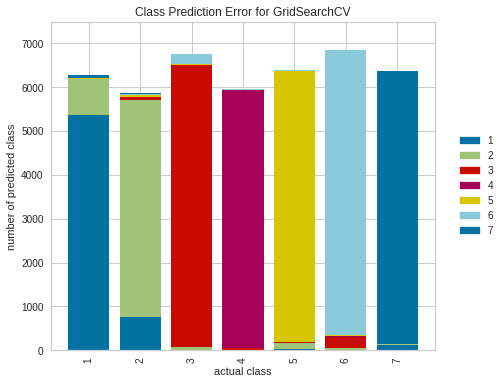

In [111]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_grid_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.poof();

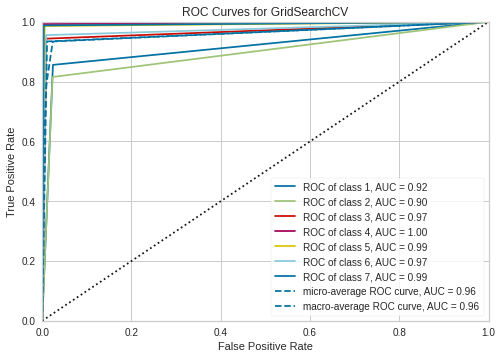

In [112]:
from yellowbrick.classifier import ROCAUC
model = DT_grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)     
visualizer.show(); 

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train,y_train)

RandomForestClassifier()

In [115]:
eval_metric(RF_model, X_train, y_train, X_test, y_test)

Test_Set
[[5717  442    1    0   16    1   79]
 [ 494 5353   67    0   98   74    5]
 [   0    6 6615   47   13  117    0]
 [   0    0    1 5917    0    1    0]
 [   1    5    6    0 6255    0    0]
 [   0    0   60   22    2 6728    0]
 [  13    0    0    0    0    0 6287]]
              precision    recall  f1-score   support

           1       0.92      0.91      0.92      6256
           2       0.92      0.88      0.90      6091
           3       0.98      0.97      0.98      6798
           4       0.99      1.00      0.99      5919
           5       0.98      1.00      0.99      6267
           6       0.97      0.99      0.98      6812
           7       0.99      1.00      0.99      6300

    accuracy                           0.96     44443
   macro avg       0.96      0.96      0.96     44443
weighted avg       0.96      0.96      0.96     44443


Train_Set
[[25026     0     0     0     0     0     0]
 [    0 24362     0     0     0     0     0]
 [    0     0 27191     0 

In [116]:
y_pred = RF_model.predict(X_test)
RF_accuracy = accuracy_score(y_test, y_pred)

In [117]:
RF_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [118]:
# cross validate

model = RandomForestClassifier()

scores = cross_validate(model, X_train, y_train, scoring='accuracy', cv=5)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_score    0.961558
dtype: float64

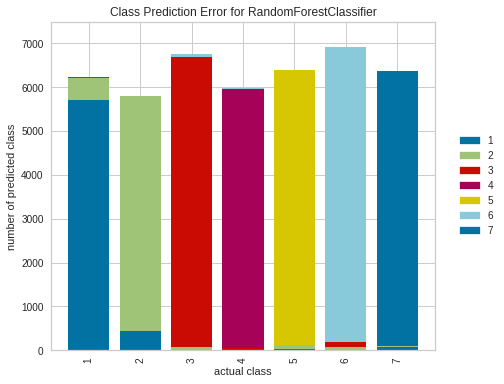

In [119]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(RF_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.poof();

In [120]:
np.sort(RF_model.feature_importances_)

array([1.51195117e-06, 5.84308595e-06, 6.04377338e-06, 7.35618107e-06,
       2.68270992e-05, 4.92643220e-05, 6.59050968e-05, 1.04446134e-04,
       1.33446661e-04, 1.53250312e-04, 2.15783205e-04, 3.03173345e-04,
       3.27741324e-04, 3.37713440e-04, 4.15780922e-04, 4.78093754e-04,
       1.11646573e-03, 1.23587620e-03, 1.41018644e-03, 1.60369550e-03,
       2.01286107e-03, 2.52911102e-03, 2.78805173e-03, 2.80028504e-03,
       2.99733796e-03, 3.32030134e-03, 3.32035206e-03, 3.54109606e-03,
       4.07722255e-03, 4.16351357e-03, 4.26218089e-03, 4.76341412e-03,
       4.78906913e-03, 4.83102525e-03, 5.72779506e-03, 6.37067023e-03,
       9.65244644e-03, 1.09744747e-02, 1.23282234e-02, 1.44403858e-02,
       1.80749723e-02, 1.80876567e-02, 1.95257877e-02, 2.75984351e-02,
       3.14489912e-02, 3.50671709e-02, 3.69943524e-02, 4.23628406e-02,
       4.42100623e-02, 6.75713663e-02, 7.06278062e-02, 7.06322094e-02,
       7.54066476e-02, 1.42524699e-01, 1.82178780e-01])

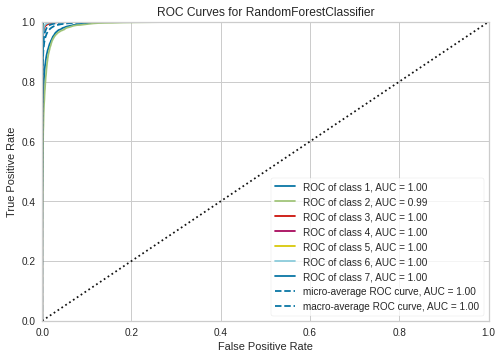

In [121]:
from yellowbrick.classifier import ROCAUC
model = RF_model
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)     
visualizer.show(); 

In [122]:
# GridSearch (this is 2nd try with new parameters as some of previous ones were at the limit)

model = RandomForestClassifier()

param_grid = {'n_estimators':[300, 400],
              'max_features':[8, 16, 'auto'],
              'max_depth':[None, 3, 5]}

RF_grid_model = GridSearchCV(model, param_grid, scoring ='accuracy', n_jobs=-1)
RF_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5],
                         'max_features': [8, 16, 'auto'],
                         'n_estimators': [300, 400]},
             scoring='accuracy')

In [123]:
RF_grid_model.best_params_

{'max_depth': None, 'max_features': 16, 'n_estimators': 400}

In [124]:
RF_grid_model.best_score_

0.96530950153904

In [125]:
eval_metric(RF_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[5753  417    1    0   15    1   69]
 [ 474 5392   61    0   92   64    8]
 [   0    6 6653   32   14   93    0]
 [   0    0    1 5915    0    3    0]
 [   1    3    5    0 6258    0    0]
 [   0    0   54   24    3 6731    0]
 [  11    0    0    0    0    0 6289]]
              precision    recall  f1-score   support

           1       0.92      0.92      0.92      6256
           2       0.93      0.89      0.91      6091
           3       0.98      0.98      0.98      6798
           4       0.99      1.00      0.99      5919
           5       0.98      1.00      0.99      6267
           6       0.98      0.99      0.98      6812
           7       0.99      1.00      0.99      6300

    accuracy                           0.97     44443
   macro avg       0.97      0.97      0.97     44443
weighted avg       0.97      0.97      0.97     44443


Train_Set
[[25026     0     0     0     0     0     0]
 [    0 24362     0     0     0     0     0]
 [    0     0 27191     0 

In [126]:
y_pred = RF_grid_model.predict(X_test)
RF_grid_accuracy = accuracy_score(y_test, y_pred)

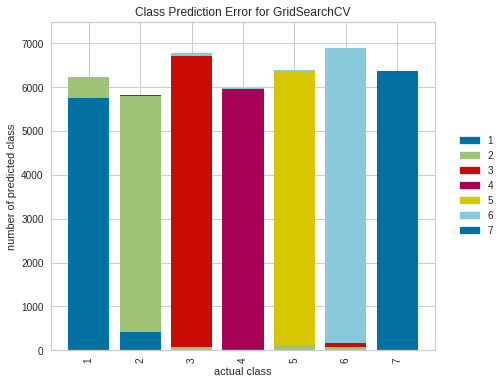

In [127]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(RF_grid_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.poof();

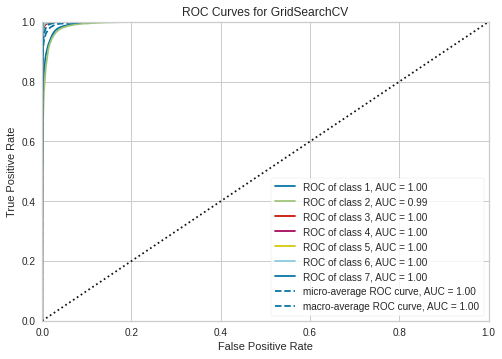

In [128]:
from yellowbrick.classifier import ROCAUC
model = RF_grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)     
visualizer.show(); 

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [129]:
from xgboost import XGBClassifier

In [130]:
XGB_model = XGBClassifier(eval_metric='mlogloss').fit(X_train, y_train)

In [131]:
eval_metric(XGB_model, X_train, y_train, X_test, y_test)

Test_Set
[[4280  811    4    0  329   18  814]
 [1593 2865  119    1 1212  216   85]
 [   0    0 4385  487  182 1744    0]
 [   0    0  145 5730    0   44    0]
 [  18  112  129    0 5845  163    0]
 [   0    0 1324  250  172 5066    0]
 [ 275    1    0    0    0    0 6024]]
              precision    recall  f1-score   support

           1       0.69      0.68      0.69      6256
           2       0.76      0.47      0.58      6091
           3       0.72      0.65      0.68      6798
           4       0.89      0.97      0.93      5919
           5       0.76      0.93      0.83      6267
           6       0.70      0.74      0.72      6812
           7       0.87      0.96      0.91      6300

    accuracy                           0.77     44443
   macro avg       0.77      0.77      0.76     44443
weighted avg       0.77      0.77      0.76     44443


Train_Set
[[17181  3169     5     0  1352    60  3259]
 [ 6060 11952   444    10  4721   864   311]
 [    0     0 17748  1902 

In [132]:
y_pred = XGB_model.predict(X_test)
XGB_accuracy = accuracy_score(y_test, y_pred)

In [133]:
XGB_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': 'mlogloss',
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'multi:softprob',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [134]:
# cross validate

# model = XGBClassifier(eval_metric='mlogloss')

# scores = cross_validate(model, X_train, y_train, scoring ='accuracy', cv=5)
# df_scores = pd.DataFrame(scores)
# df_scores.mean()[2:]

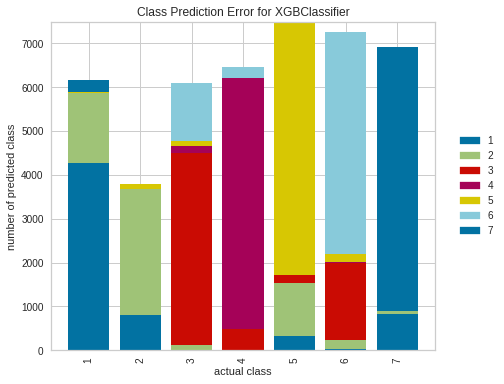

In [135]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(XGB_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.poof();

In [136]:
np.sort(XGB_model.feature_importances_)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00044081,
       0.0007004 , 0.00281937, 0.00468319, 0.00601268, 0.00726935,
       0.00739589, 0.00818686, 0.00877083, 0.00881716, 0.00896188,
       0.00925756, 0.00941562, 0.01017098, 0.01071831, 0.01269979,
       0.0130776 , 0.01314075, 0.01384567, 0.01398287, 0.01429917,
       0.01534107, 0.01628734, 0.01701208, 0.01952526, 0.02032478,
       0.02071764, 0.02126724, 0.02393362, 0.02473897, 0.02479123,
       0.03223136, 0.03641123, 0.03740525, 0.05003524, 0.05037269,
       0.05258789, 0.05468751, 0.07618286, 0.09930234, 0.12217773],
      dtype=float32)

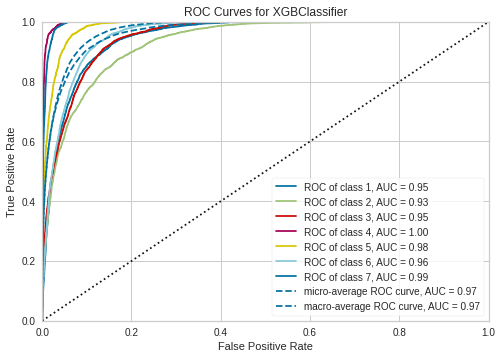

In [137]:
from yellowbrick.classifier import ROCAUC
model = XGB_model
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)     
visualizer.show(); 

In [138]:
# Grid Search codes could not be run due to the machine power and time constraint

XGB_model = XGBClassifier(eval_metric='mlogloss')

param_grid = {"n_estimators":[50, 300], 'max_depth':[3, 4, 5], "learning_rate": [0.1, 0.2]}

XGB_grid_model = GridSearchCV(XGB_model, param_grid, scoring='accuracy', n_jobs=-1)
XGB_grid_model.fit(X_train, y_train)

In [ ]:
XGB_grid_model.best_params_

In [ ]:
XGB_grid_model.best_score_

In [ ]:
eval_metric(XGB_grid_model, X_train, y_train, X_test, y_test)

In [ ]:
y_pred = XGB_grid_model.predict(X_test)
XGB_grid_accuracy = accuracy_score(y_test, y_pred)
XGB_grid_auc = roc_auc_score(y_test, y_pred)

In [ ]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(XGB_grid_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.poof();

In [ ]:
from yellowbrick.classifier import ROCAUC
model = RF_grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)     
visualizer.show(); 

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

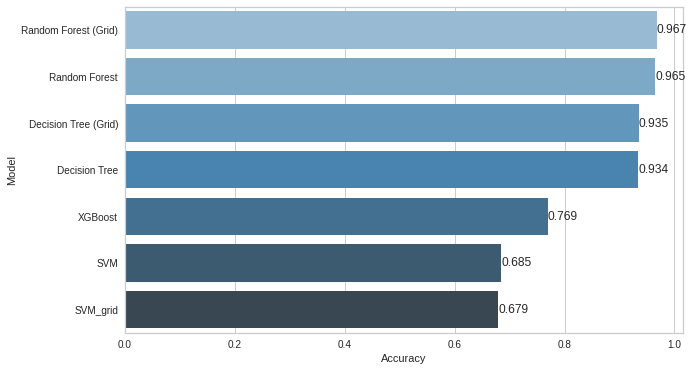

In [140]:
compare = pd.DataFrame({"Model": ["SVM", "SVM_grid", "Decision Tree (Grid)", "Decision Tree", "Random Forest", 
                                  "Random Forest (Grid)", "XGBoost"],
                        "Accuracy": [SVM_accuracy, SVM_grid_accuracy, DT_accuracy, DT_grid_accuracy, 
                                     RF_accuracy, RF_grid_accuracy, XGB_accuracy]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(10,6))
plt.subplot(111)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.show()

# F1 Score Comparison

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___